In [1]:
%matplotlib inline
# %matplotlib widget

# Plot R by G (for W3C)

In [2]:
import csv
import os
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.facecolor':'white'})

In [10]:
from demapper.code.utils.analyze import extract_dataset, get_all_parameters, plot_results, plot_limits, _handle_list_cols
from demapper.code.utils.config_w3c import DATASETS, FILTERS, get_plot_columns, extract_params_f

circle_loss_threshold = 10.0

In [6]:
# PICKED_DATASET = 'ss_w3cv3'
PICKED_DATASET = 'ss_w3cv5'

datadir = DATASETS[PICKED_DATASET]
stats_path = os.path.join(datadir, 'compute_stats-combined.csv')
results_path = os.path.join(datadir, 'scores-all.csv')

filter_by = FILTERS[PICKED_DATASET][0]
df, max_values = extract_dataset(stats_path, results_path, filter_by, extract_params_f)

resdir = datadir
if len(FILTERS[PICKED_DATASET]) > 1:
    resdir = os.path.join(datadir, filter_by)
    os.makedirs(resdir, exist_ok=True)


all_sbjs, sbjs_map = get_all_parameters(df, PICKED_DATASET)

print(max_values)
df.sample(5)

len(stats):  10080
len(results):  10080
Total 14 subjects:
SBJ20
SBJ20-50.0
SBJ20-75.0
SBJ20-83.0
SBJ21
SBJ40
SBJ40-50.0
SBJ40-75.0
SBJ40-83.0
SBJ41
SBJ99
SBJ99-50.0
SBJ99-75.0
SBJ99-83.0
Extra combinations:
SBJ2x : ['SBJ20', 'SBJ21']
SBJ4x : ['SBJ40', 'SBJ41', 'SBJ42', 'SBJ43']
SBJxx-50 : ['SBJ20-50.0', 'SBJ40-50.0', 'SBJ99-50.0']
SBJxx-75 : ['SBJ20-75.0', 'SBJ40-75.0', 'SBJ99-75.0']
SBJxx-83 : ['SBJ20-83.0', 'SBJ40-83.0', 'SBJ99-83.0']
SBJxx-99 : ['SBJ20', 'SBJ40', 'SBJ99']
{'CircleLoss': 53.699999999999996, 'TransitionBetweeness': 28.5}


,Mapper,SBJ,preptype,dist,K,R,G,linkbins,CircleLoss,TransitionBetweeness,coverage_nodes,coverage_TRs,hrfdur_stat,distances_max,distances_entropy,assortativity,degree_TRs_avg,degree_TRs_entropy
1093,CustomBDLMapper_PCA_cityblock_16_10_55_10,SBJ20-50.0,PCA,cityblock,16,10,55,10,0.533333,1.0,1.000000,1.000000,0.584615,8.0,3.05856,0.372066,27.9916,3.82018
5979,CustomBDLMapper_none_chebychev_48_30_55_20,SBJ20-50.0,none,chebychev,48,30,55,20,53.700000,28.5,0.370143,0.453782,0.231084,16.0,3.32546,0.056199,86.3938,6.66706
6591,CustomBDLMapper_none_cityblock_32_10_70_10,SBJ99-50.0,none,cityblock,32,10,70,10,0.218182,0.0,1.000000,1.000000,0.594937,6.0,2.65229,0.534773,56.9568,4.79352
7009,CustomBDLMapper_none_cityblock_48_30_70_10,SBJ41,none,cityblock,48,30,70,10,53.700000,28.5,0.564626,0.593281,0.663265,15.0,3.53649,0.540756,228.1280,6.21109
1791,CustomBDLMapper_PCA_cityblock_48_10_55_20,SBJ99-83.0,PCA,cityblock,48,10,55,20,1.000000,2.0,1.000000,1.000000,0.349057,8.0,2.96145,0.191937,42.5141,4.40962


In [34]:

target_metrics = ['CircleLossRev', 'TransitionBetweenessRev', 'coverage_nodes', 'hrfdur_stat', 'distances_entropy']
log_metrics = ['CircleLossRev', 'TransitionBetweenessRev']

df['CircleLossRev'] = df.apply(lambda x: 1.0 / x['CircleLoss'] if x['CircleLoss'] > 0 else 100, axis=1)
df['TransitionBetweenessRev'] = df.apply(lambda x: 1.0 / (x['TransitionBetweeness'] + 1), axis=1)

plot_results(df, 'SBJ99_KRG', ['SBJ99'], 'K', 'R', 'G', target_metrics, log_metrics, resdir=resdir)


In [35]:
# Plot limits

target_metrics = {
    'TransitionBetweeness': [0, max_values['TransitionBetweeness'] * 0.99],
    'coverage_nodes': [0.7, 1.0],
#     'hrfdur_stat': [0.15, 1.0],
    'distances_entropy': [2.0, 10000.0]
}

plot_limits(df, 'SBJ99_KRG', ['SBJ99'], 'K', 'R', 'G', target_metrics, resdir=resdir)

In [36]:
fullname = {
    'R': 'Resolution',
    'G': 'Gain'
}


target_metrics = {
    'TransitionBetweeness': [0, max_values['TransitionBetweeness'] * 0.99],
    'coverage_nodes': [0.7, 1.0],
#     'hrfdur_stat': [0.15, 1.0],
    'distances_entropy': [2.0, 10000.0]
}

def plot_merger(df, sbj_group_name, sbj_group, fixedV, fixedVals, indexV, colV, target_metrics, resdir):
    df, fixedV = _handle_list_cols(df, fixedV)
    df, indexV = _handle_list_cols(df, indexV)
    df, colV = _handle_list_cols(df, colV)

    newtypes = {}
    allcols = []
    for col in [fixedV, indexV, colV]:
        col = col if type(col) == list else [col]
        allcols.extend(col)
        for c in col:
            if c in ['K', 'G', 'R', 'linkbins']:
                newtypes[c] = 'int'

    df_filter = df['SBJ'] == sbj_group[0]
    for idx in range(1,len(sbj_group)):
        df_filter = df_filter | (df['SBJ'] == sbj_group[idx])

    dff = df[df_filter]
    dff = dff.groupby(['Mapper'] + allcols).mean()
    dff = dff.reset_index().astype(newtypes)

    fixed_vals = sorted(list(set(df[fixedV].to_list())))
    # Create combs
    combs = []
    for col_idx,K in enumerate(fixed_vals):
        comb_isset = False
        df_comb = None
        for target, lims in target_metrics.items():
            df_p = dff[dff[fixedV] == K].pivot(index=indexV, columns=colV, values=target)
            df_wl = (df_p >= lims[0]) & (df_p <= lims[1]) # within limits
            if not comb_isset:
                df_comb = df_wl
                comb_isset = True
            else:
                df_comb = df_comb & df_wl

        combs.append(df_comb)
        
    iV = combs[0].index.to_list()
    cV = combs[0].columns.to_list()
    added = np.zeros_like(combs[0].to_numpy())

    cnt = 0
    for k,fV in enumerate(fixed_vals):
        if fV in fixedVals:
            M = combs[k].to_numpy() * 1
#             print(fV, added.shape, M.shape)
            added = added + M
            cnt += 1

    ax = sns.heatmap(np.flip(added / cnt, 0), xticklabels=cV, yticklabels=iV[::-1], vmax=1.0)
    ax.set_ylabel(fullname[indexV])
    ax.set_xlabel(fullname[colV])
    plt.tight_layout()
    plt.savefig(os.path.join(resdir,'plot_merger{}{}_{}.png'.format(indexV, colV, sbj_group_name)), dpi=150)
    plt.close()


In [37]:

for sbj_group_name, sbj_group in tqdm(sbjs_map.items()):
    fixedV = 'K'
    fixedVals = [10, 20, 30, 40, 50, 60, 70] # for NeuMapper and BDLMapper
    plot_merger(df, sbj_group_name, sbj_group, fixedV, fixedVals, 'R', 'G', target_metrics, resdir=resdir)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.62it/s]


,Mapper,SBJ,K,R,G,CircleLoss,TransitionBetweeness,mapper,coverage_nodes,coverage_TRs,hrfdur_stat,distances_max,distances_entropy,assortativity,degree_TRs_avg,degree_TRs_entropy,CircleLossRev,TransitionBetweenessRev
0,NeuMapper_100_100_25,SBJ20,100,100,25,60.334951,4.5,NeuMapper_100_100_25,0.553957,0.584883,0.460432,20.0,3.80631,0.022352,28.5225,5.93724,0.016574,0.181818
1,NeuMapper_100_100_25,SBJ20-50.0,100,100,25,60.334951,4.5,NeuMapper_100_100_25,0.264706,0.403361,0.264706,10.0,2.69076,0.084638,16.2809,5.24022,0.016574,0.181818
2,NeuMapper_100_100_25,SBJ20-75.0,100,100,25,60.334951,4.5,NeuMapper_100_100_25,0.409091,0.440000,0.393939,16.0,3.55220,0.075818,24.9488,5.78353,0.016574,0.181818
3,NeuMapper_100_100_25,SBJ20-83.0,100,100,25,60.334951,4.5,NeuMapper_100_100_25,0.458015,0.499638,0.404580,17.0,3.48939,0.156666,34.5293,6.26467,0.016574,0.181818
4,NeuMapper_100_100_25,SBJ21,100,100,25,60.334951,4.5,NeuMapper_100_100_25,0.400000,0.538692,0.453846,11.0,3.11294,0.063801,32.7115,6.17703,0.016574,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,NeuMapper_80_50_75,SBJ41,80,50,75,0.444444,4.5,NeuMapper_80_50_75,1.000000,1.000000,1.000000,3.0,1.43237,0.096786,374.9180,4.92024,2.250000,0.181818
11756,NeuMapper_80_50_75,SBJ99,80,50,75,0.092437,4.5,NeuMapper_80_50_75,1.000000,1.000000,0.962264,3.0,1.57309,0.232076,298.6230,3.93364,10.818182,0.181818
11757,NeuMapper_80_50_75,SBJ99-50.0,80,50,75,0.133333,0.0,NeuMapper_80_50_75,1.000000,1.000000,0.903846,4.0,1.89020,0.064162,230.0550,3.91960,7.500000,1.000000
11758,NeuMapper_80_50_75,SBJ99-75.0,80,50,75,0.076923,0.0,NeuMapper_80_50_75,1.000000,1.000000,0.888889,4.0,1.76498,0.138503,240.1440,4.30888,13.000000,1.000000


In [31]:

for sbj_group_name, sbj_group in tqdm(sbjs_map.items()):
    fixedV = 'K'
    fixedVals = [10, 20, 30, 40, 50, 60, 70]
    dff = df[df['R'] <= 500]
    plot_merger(dff, sbj_group_name, sbj_group, fixedV, fixedVals, 'G', 'R', target_metrics, resdir=resdir)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.37it/s]


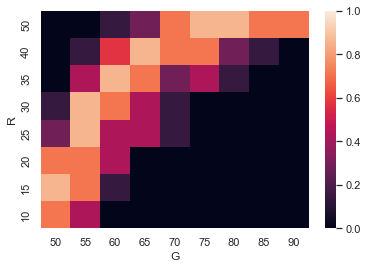

In [79]:
fixedV = 'K'
fixedVals = [10, 20, 30, 40, 50, 60, 70]
plot_merger(df, 'SBJ99_KRG', ['SBJ41'], fixedV, fixedVals, 'R', 'G', target_metrics, resdir=resdir)

In [ ]:

for sbj_group_name, sbj_group in tqdm(sbjs_map.items()):
    fixedV = 'K'
    fixedVals = [10, 20, 30, 40, 50, 60, 70] # for NeuMapper and BDLMapper
    plot_merger(df, sbj_group_name, sbj_group, fixedV, fixedVals, 'R', 'G', target_metrics, resdir=resdir)

<AxesSubplot:>

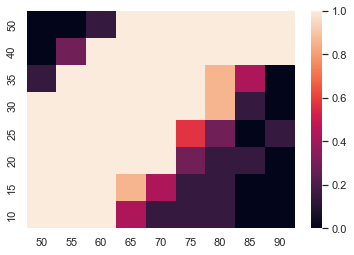

In [45]:
sns.heatmap(np.flip(added / cnt, 1), xticklabels=G, yticklabels=R[::-1])

array([[ True,  True,  True,  True,  True,  True, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True, False, False],
       [False, False, False,  True,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True]])

# Plot R by G for CME

In [1]:
import csv
import os
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.facecolor':'white'})

In [2]:
from demapper.code.utils.analyze import extract_dataset, plot_results, plot_limits, _handle_list_cols
from demapper.code.utils.config_cme import ALL_DATASETS, FILTERS, get_plot_columns, extract_params_f


In [44]:
fullname = {
    'R': 'Resolution',
    'G': 'Gain'
}

def add_heatmaps(combs, fixedVals):
    assert len(fixedVals) == len(combs)
    added = np.zeros_like(combs[0].to_numpy())
    for k,fV in enumerate(fixedVals):
        M = combs[k].to_numpy() * 1
        added = added + M
    return added

def plot_merger(df, sbj_group_name, sbj_group, fixedV, fixedVals, indexV, colV,
                target_metrics, displayed_target_param, resdir,
                TR=None, heatmap_vmin=None, heatmap_vmax=None):
    df, fixedV = _handle_list_cols(df, fixedV)
    df, indexV = _handle_list_cols(df, indexV)
    df, colV = _handle_list_cols(df, colV)

    newtypes = {}
    allcols = []
    for col in [fixedV, indexV, colV]:
        col = col if type(col) == list else [col]
        allcols.extend(col)
        for c in col:
            if c in ['K', 'G', 'R', 'linkbins']:
                newtypes[c] = 'int'

    if len(sbj_group):
        df_filter = df['SBJ'] == sbj_group[0]
        for idx in range(1,len(sbj_group)):
            df_filter = df_filter | (df['SBJ'] == sbj_group[idx])
    else:
        df_filter = df['G'] > 0

    dff = df[df_filter]
    dff = dff.groupby(['Mapper'] + allcols).mean()
    dff = dff.reset_index().astype(newtypes)

    # Create combs
    combs = []
    combs_target = []
    for K in fixedVals:
        comb_isset = False
        df_comb = None
        for target, lims in target_metrics.items():
            df_p = dff[dff[fixedV] == K].pivot(index=indexV, columns=colV, values=target)
            df_wl = (df_p >= lims[0]) & (df_p <= lims[1]) # within limits
            if not comb_isset:
                df_comb = df_wl
                comb_isset = True
            else:
                df_comb = df_comb & df_wl
        combs.append(df_comb)

        target_df_p = dff[dff[fixedV] == K].pivot(index=indexV, columns=colV, values=displayed_target_param)
        combs_target.append(target_df_p * df_comb)

    iV = combs[0].index.to_list()
    cV = combs[0].columns.to_list()

    added = add_heatmaps(combs, fixedVals)
    added_target = add_heatmaps(combs_target, fixedVals)

    M = np.divide(np.multiply(added_target, added > 0), added, where=added > 0)
    if TR:
        M = M * TR
    M[added == 0] = np.NaN


    extra_args = {}
    if heatmap_vmin is not None:
        extra_args['vmin'] = heatmap_vmin
    if heatmap_vmax is not None:
        extra_args['vmax'] = heatmap_vmax
    ax = sns.heatmap(np.flip(M, 0), xticklabels=cV, yticklabels=iV[::-1], cmap='magma_r', **extra_args)
    ax.set_ylabel(fullname[indexV])
    ax.set_xlabel(fullname[colV])
    ax.set_facecolor('white')
    plt.tight_layout()
    # plt.show()
    plt.savefig(
        os.path.join(
            resdir,
            'plot_merger{}{}_K={}_{}.png'.format(
                indexV,
                colV,
                ','.join([str(k) for k in fixedVals]),
                sbj_group_name)),
        dpi=150)
    plt.close()


In [24]:
# PICKED_DATASET = 'ss_w3cv3'
PICKED_DATASET = 'cmev4euc_fast'
CH = 'ch10'
TYPE='compute_degrees_from_TCM'

datadir = ALL_DATASETS[CH][PICKED_DATASET]
stats_path = os.path.join(datadir, 'compute_stats-averaged.csv')
results_path = os.path.join(datadir, '{0}/combined-{0}.csv'.format(TYPE))

filter_by = FILTERS[PICKED_DATASET][0]
df, max_values = extract_dataset(stats_path, results_path, filter_by, extract_params_f, has_sbj=False)

resdir = datadir
if len(FILTERS[PICKED_DATASET]) > 1:
    resdir = os.path.join(datadir, filter_by)
    os.makedirs(resdir, exist_ok=True)

print(max_values)
df.sample(5)

len(stats):  900
len(results):  900
{}


,Mapper,K,R,G,ChangePointsIndicesError,ChangePointsCount,assortativity-mean,assortativity-std,coverage_TRs-mean,coverage_TRs-std,...,degree_TRs_avg-mean,degree_TRs_avg-std,degree_TRs_entropy-mean,degree_TRs_entropy-std,distances_entropy-mean,distances_entropy-std,distances_max-mean,distances_max-std,hrfdur_stat-mean,hrfdur_stat-std
10,EucNeuMapper_12_150_25,12,150,25,7.000000,10.0,0.022348,0.049444,0.745056,0.115043,...,11.570744,3.715073,4.604937,0.424332,3.267319,0.492229,19.222222,5.208088,0.165872,0.039282
825,EucNeuMapper_8_150_50,8,150,50,18.142857,10.0,0.092192,0.130266,0.999454,0.000906,...,681.837444,190.577004,8.974743,0.241321,1.710502,0.297651,5.388889,1.036901,0.814478,0.103171
126,EucNeuMapper_16_250_55,16,250,55,18.857143,10.0,0.020177,0.176546,0.999508,0.000773,...,1214.146278,262.786666,9.310919,0.195763,1.736376,0.304162,6.333333,1.371989,0.484506,0.099667
384,EucNeuMapper_36_200_45,36,200,45,35.000000,10.0,-0.057427,0.136721,0.999071,0.002750,...,1159.672389,175.931243,9.417858,0.134763,1.677439,0.271112,6.000000,1.188177,0.373590,0.087491
802,EucNeuMapper_6_50_35,6,50,35,28.285714,10.0,0.016577,0.066095,0.999235,0.001602,...,198.320389,70.375693,7.772613,0.430476,1.551230,0.265943,3.833333,0.857493,0.947460,0.050928


In [25]:
TR = 1.5
target_metrics = {
    'coverage_nodes-mean': [0.7, 1.0],
    'hrfdur_stat-mean': [0.15, 1.0],
    'distances_entropy-mean': [2.0, 10000.0]
}

fixedV, indexV, colV = get_plot_columns(filter_by)
sbj_group = []
indexV, colV = 'R', 'G'
fixedV = 'K'

all_fixed_vals = [
    [8, 16, 32, 48, 64],
    [8, 12, 16, 24, 32, 36, 48, 64],
    [4, 6, 8, 12, 16, 24, 32, 36, 48, 64]
]
# print('All values: ', sorted(df[fixedV].drop_duplicates()))
# print('Selected values: ', fixedVals)

displayed_target_param = 'ChangePointsIndicesError'


for fixedVals in all_fixed_vals:
    plot_merger(df, '', [], 'K', fixedVals, 'R', 'G', target_metrics, displayed_target_param, resdir, TR)

### Redo for distances

In [91]:
# PICKED_DATASET = 'ss_w3cv3'
PICKED_DATASET = 'cmev6kval'
CH = 'ch10'
TYPE='compute_degrees_from_TCM'

datadir = ALL_DATASETS[CH][PICKED_DATASET]
stats_path = os.path.join(datadir, 'compute_stats-averaged.csv')
results_path = os.path.join(datadir, '{0}/combined-{0}.csv'.format(TYPE))

filter_by = FILTERS[PICKED_DATASET][0] #### <<--- change this to 2 to get NeuMapper
df, max_values = extract_dataset(stats_path, results_path, filter_by, extract_params_f, has_sbj=False)

resdir = datadir
if len(FILTERS[PICKED_DATASET]) > 1:
    resdir = os.path.join(datadir, filter_by)
    os.makedirs(resdir, exist_ok=True)

print(max_values)
df.sample(5)

len(stats):  4125
len(results):  4125
{}


,Mapper,dist,K,R,G,ChangePointsIndicesError,ChangePointsCount,assortativity-mean,assortativity-std,coverage_TRs-mean,...,degree_TRs_avg-mean,degree_TRs_avg-std,degree_TRs_entropy-mean,degree_TRs_entropy-std,distances_entropy-mean,distances_entropy-std,distances_max-mean,distances_max-std,hrfdur_stat-mean,hrfdur_stat-std
1777,DistsGeoBDLMapper_euclidean_12_10_50,euclidean,12,10,50,2.571429,10.0,0.013570,0.144524,0.998744,...,37.674867,5.483047,3.890104,0.482442,3.310719,0.295953,14.611111,4.272193,0.277395,0.055067
849,DistsGeoBDLMapper_cityblock_64_30_70,cityblock,64,30,70,5.428571,10.0,-0.138771,0.057664,0.973124,...,429.450500,57.228657,8.469447,0.264501,3.228835,0.163526,18.666667,2.473388,0.188106,0.063802
1546,DistsGeoBDLMapper_cosine_3_30_40,cosine,3,30,40,28.428571,9.0,0.454815,0.123807,0.898121,...,13.287719,3.458475,4.440758,0.437991,4.944489,0.357820,40.555556,9.357113,0.583356,0.153567
1571,DistsGeoBDLMapper_cosine_48_30_40,cosine,48,30,40,107.857143,8.0,-0.010111,0.021678,0.196329,...,9.466354,1.694745,4.543348,0.225922,4.239013,0.534158,28.722222,10.548518,0.242229,0.026856
1683,DistsGeoBDLMapper_cosine_8_15_60,cosine,8,15,60,25.714286,10.0,-0.024710,0.102740,0.998634,...,153.132444,8.162753,7.265330,0.272064,2.861028,0.146832,11.555556,1.916560,0.291913,0.053129


### Generate the merger plots

In [92]:
TR = 1.5
target_metrics = {
    'coverage_nodes-mean': [0.7, 1.0],
    'hrfdur_stat-mean': [0.15, 1.0],
    'distances_entropy-mean': [2.0, 10000.0]
}


sbj_group = []
indexV, colV = 'R', 'G'
fixedV = 'K'

all_fixed_vals = [
#     [6, 8, 12, 24],
#     [8, 16, 32, 48, 64],
#     [8, 12, 16, 24, 32, 48, 64],
    [4, 6, 8, 12, 16, 24, 32, 48, 64]
]
# print('All values: ', sorted(df[fixedV].drop_duplicates()))
# print('Selected values: ', fixedVals)

displayed_target_param = 'ChangePointsIndicesError'
heatmap_vmin = np.min(df['ChangePointsIndicesError'])
heatmap_vmax = 30

for dist in df['dist'].drop_duplicates().to_list():
    fdf = df[df['dist'] == dist]
#     print(len(fdf), dist)
    for fixedVals in all_fixed_vals:
        plot_merger(fdf, dist, [], 'K', fixedVals, 'R', 'G', target_metrics, displayed_target_param, resdir, TR, 
                   heatmap_vmin, heatmap_vmax)
        
    for fixedVal in all_fixed_vals[-1]:
        plot_merger(fdf, dist, [], 'K', [fixedVal], 'R', 'G', target_metrics, displayed_target_param, resdir, TR,
                   heatmap_vmin, heatmap_vmax)

### Get the delay times for mappers of interest

In [47]:
mappers = [
  'DistsGeoBDLMapper_euclidean_12_20_50', 
  'DistsGeoBDLMapper_cityblock_12_20_50', 
  'DistsGeoBDLMapper_chebychev_12_20_50', 
  'DistsGeoBDLMapper_correlation_12_20_50', 
  'DistsBDLMapper_euclidean_20_50', 
  'DistsBDLMapper_correlation_20_50',]


df2, _ = extract_dataset(stats_path, results_path, FILTERS[PICKED_DATASET][1], extract_params_f, has_sbj=False)

for mapper_name in mappers:
    fdf = df[df['Mapper'] == mapper_name]
    if len(fdf):
        print(mapper_name, fdf['ChangePointsIndicesError'])
    else:
        fdf = df2[df2['Mapper'] == mapper_name]
        print(mapper_name, fdf['ChangePointsIndicesError'])
    
    

len(stats):  4125
len(results):  4125
DistsGeoBDLMapper_euclidean_12_20_50 1787    5.714286
Name: ChangePointsIndicesError, dtype: float64
DistsGeoBDLMapper_cityblock_12_20_50 587    3.714286
Name: ChangePointsIndicesError, dtype: float64
DistsGeoBDLMapper_chebychev_12_20_50 187    5.571429
Name: ChangePointsIndicesError, dtype: float64
DistsGeoBDLMapper_correlation_12_20_50 987    42.142857
Name: ChangePointsIndicesError, dtype: float64
DistsBDLMapper_euclidean_20_50 112    21.142857
Name: ChangePointsIndicesError, dtype: float64
DistsBDLMapper_correlation_20_50 62    120.857143
Name: ChangePointsIndicesError, dtype: float64


### From the merger individual plots generate a grid of distances by k-values

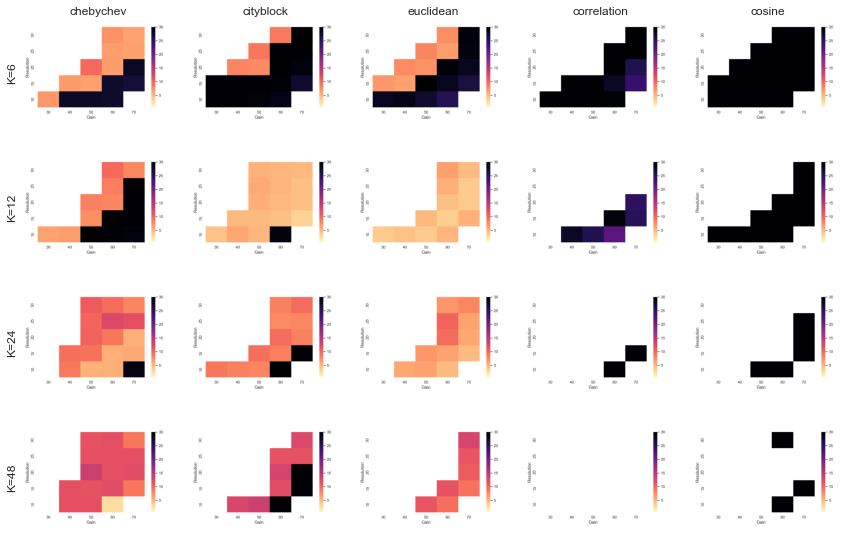

In [93]:
from PIL import Image


def plot_image(img_path, ax):
    im = Image.open(img_path)
    img = np.array(im)
    ax.imshow(img)
    del img
    del im
    return ax


dists = ['chebychev', 'cityblock', 'euclidean', 'correlation', 'cosine']
kvals = [6, 12, 24, 48]
if 'NeuMapper' in filter_by:
    kvals = [6, 8, 12, 24]

f, axr = plt.subplots(figsize=(12,8), nrows=len(kvals), ncols=len(dists))

for rid, (kval, axc) in enumerate(zip(kvals, axr)):
    for cid, (dist, ax) in enumerate(zip(dists, axc)):
        img_path = os.path.join(resdir, 'plot_mergerRG_K={}_{}.png'.format(kval, dist))
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.grid(False)
        plot_image(img_path, ax)
        if rid == 0:
            ax.set_title(dist)
        if cid == 0:
            ax.set_ylabel('K=' + str(kval))
        
plt.tight_layout()
plt.savefig(os.path.join(resdir, '../', filter_by + '_dists_by_K_delays.png'), dpi=100)
plt.show()